In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
df = pd.read_csv("Superstore.csv", encoding='latin1')

In [5]:
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
print(df.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [8]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [9]:
df[df['Postal Code'].isnull()]



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


We can see that the postal code is not mentioned only for Burlington city in Vermont state. So, we need to fill the postal code of that city.


In [ ]:
df['Postal Code'] = df['Postal Code'].fillna(5401)

In [ ]:
print(df.isnull().sum())

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [12]:
df[['Order Date', 'Ship Date']].head()


,Order Date,Ship Date
0,2016-11-08,2016-11-11
1,2016-11-08,2016-11-11
2,2016-06-12,2016-06-16
3,2015-10-11,2015-10-18
4,2015-10-11,2015-10-18


In [13]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days


In [14]:
df.shape

(9994, 24)

In [15]:
df.duplicated().sum()

0

In [17]:
df.to_csv('cleaned_data.csv', index=False)


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker

<b>What is the total sales and profit over the years?</b>

<Axes: xlabel='Year', ylabel='Sales'>

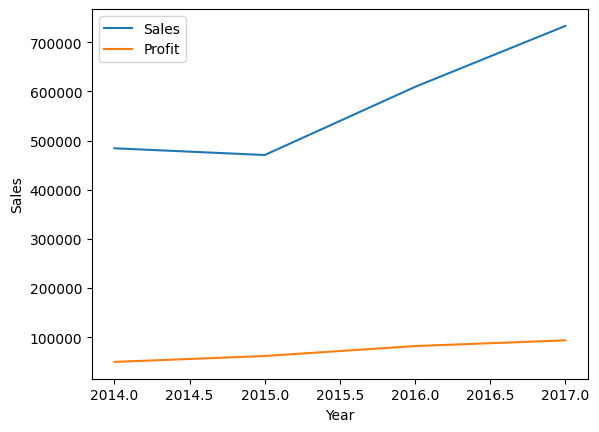

In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
yearly_stats = df.groupby('Year').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()

import seaborn as sns
sns.lineplot(data=yearly_stats, x='Year', y='Sales', label='Sales')
sns.lineplot(data=yearly_stats, x='Year', y='Profit', label='Profit')

<b>Which months have the highest sales?</b>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'November'),
  Text(1, 0, 'December'),
  Text(2, 0, 'September'),
  Text(3, 0, 'March'),
  Text(4, 0, 'October'),
  Text(5, 0, 'August'),
  Text(6, 0, 'May'),
  Text(7, 0, 'June'),
  Text(8, 0, 'July'),
  Text(9, 0, 'April'),
  Text(10, 0, 'January'),
  Text(11, 0, 'February')])

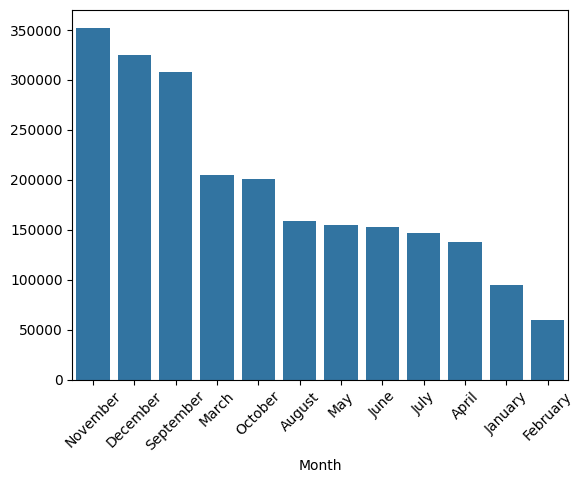

In [23]:
df['Month'] = df['Order Date'].dt.month_name()
monthly_sales = df.groupby('Month')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.xticks(rotation=45)

Let's look at the revenue generated by each category

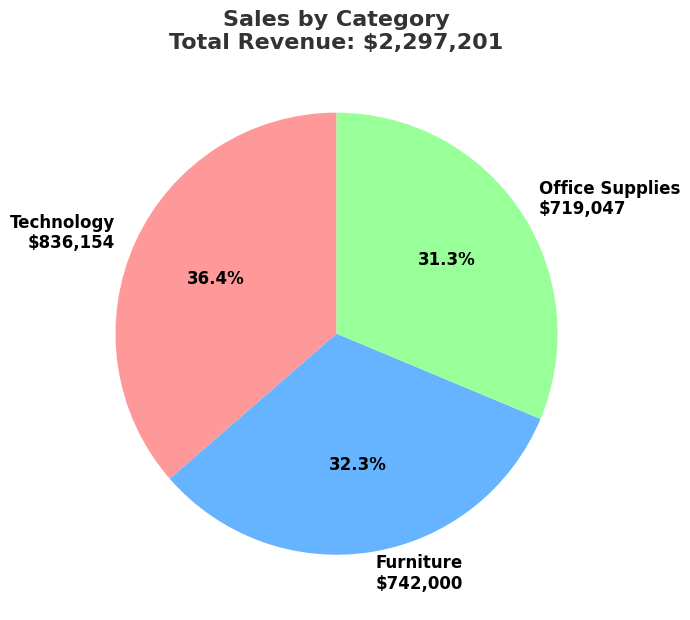

In [24]:
import matplotlib.pyplot as plt

# Group data
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

# Total revenue
total_revenue = category_sales.sum()

# Pie chart

plt.figure(figsize=(7, 7))
plt.pie(category_sales,
        labels=[f"{cat}\n${sales:,.0f}" for cat, sales in category_sales.items()],
        autopct=lambda p: f'{p:.1f}%',  
        colors = ['#ff9999','#66b3ff','#99ff99'],
        startangle=90,
        textprops={'fontsize': 12, 'color': 'black', 'weight': 'bold'})

# Title
plt.title(f"Sales by Category\nTotal Revenue: ${total_revenue:,.0f}", fontsize=16, fontweight='bold', color='#333')

plt.tight_layout()
plt.show()


We can see that Category Technology generated the highest revenue of about $827426.

The Total Revenue generated by all the categories: $2261536

<b>Which Sub-Category contributed most to the revenue?</b>

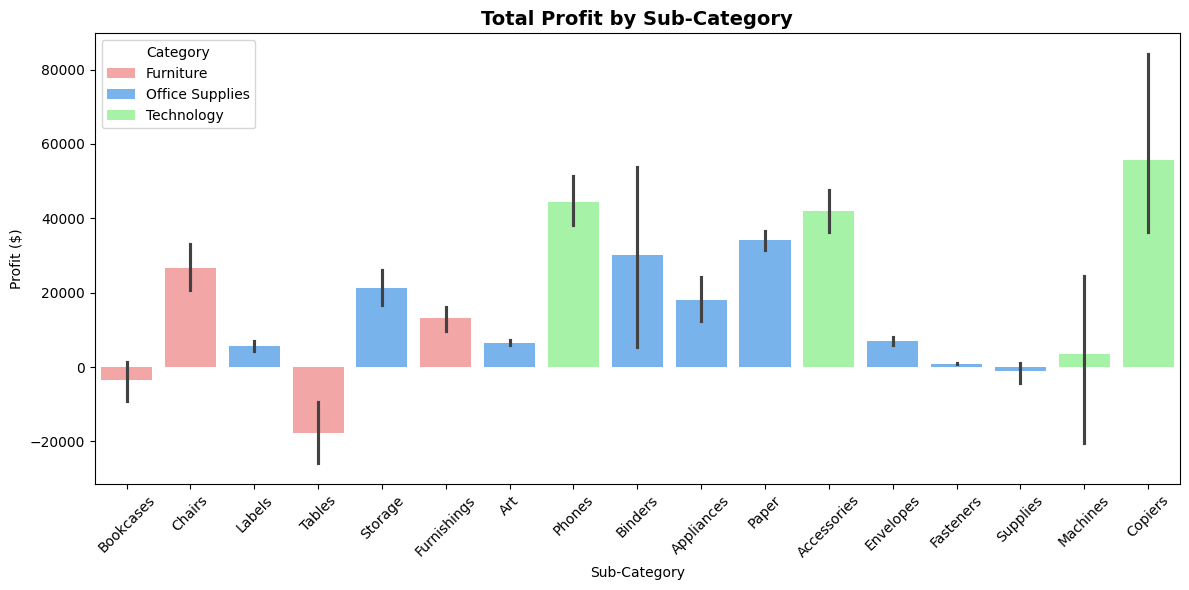

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Sub-Category', y='Profit', hue='Category', estimator='sum',
            palette=['#ff9999', '#66b3ff', '#99ff99'])
plt.title("Total Profit by Sub-Category", fontsize=14, fontweight='bold')
plt.ylabel("Profit ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We can see that Sub-Category <b>Phones</b> from Category <b>Technology</b> generated the highest revenue.

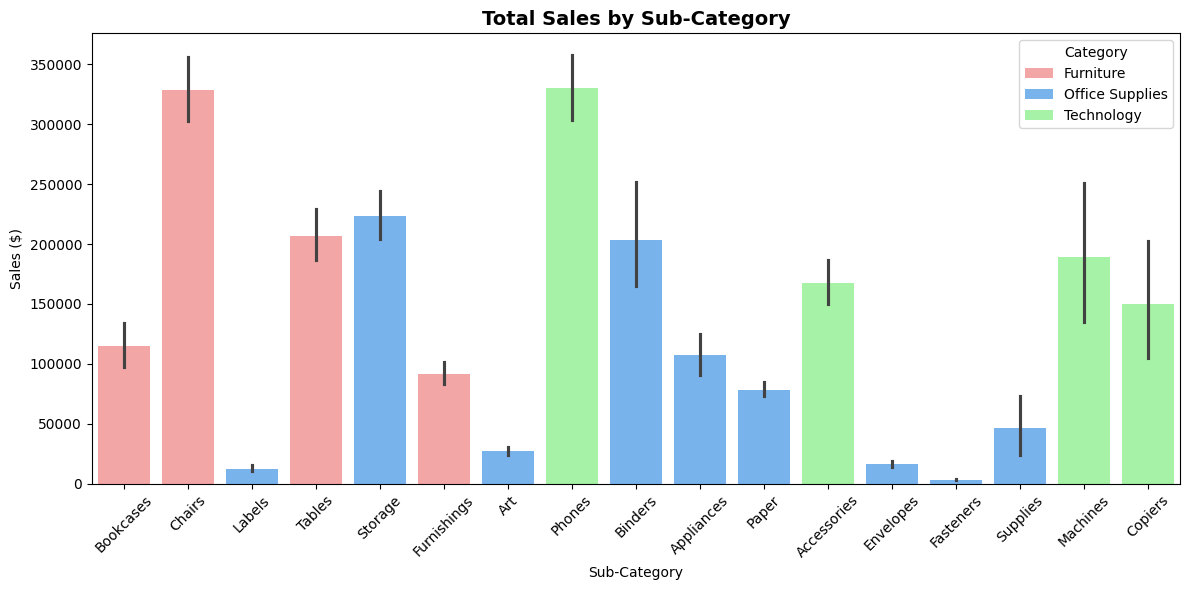

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Sub-Category', y='Sales', hue='Category', estimator='sum',
            palette=['#ff9999', '#66b3ff', '#99ff99'])
plt.title("Total Sales by Sub-Category", fontsize=14, fontweight='bold')
plt.ylabel("Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<b>Which Region has the highest sales?</b>

C:\Users\CG\AppData\Local\Temp\ipykernel_36032\1751127537.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=region_sales.values, y=region_sales.index, palette=['#ff9999', '#66b3ff', '#99ff99', '#FFFA8D'])


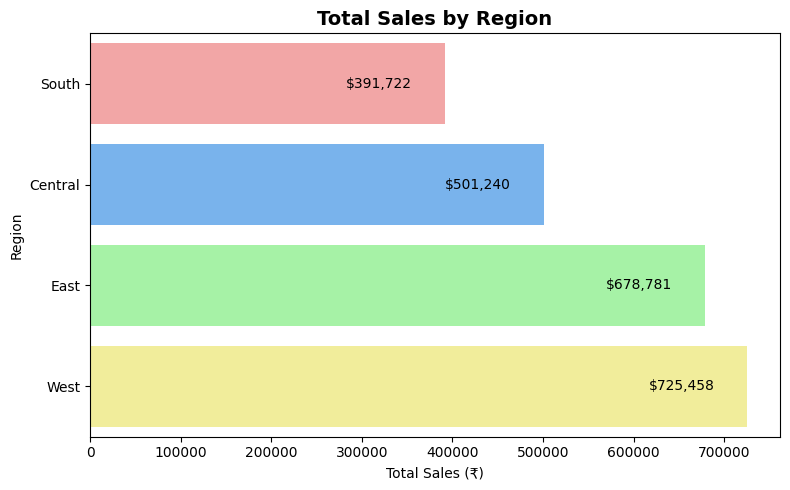

In [27]:
plt.figure(figsize=(8, 5))
region_sales = df.groupby('Region')['Sales'].sum().sort_values()
ax = sns.barplot(x=region_sales.values, y=region_sales.index, palette=['#ff9999', '#66b3ff', '#99ff99', '#FFFA8D'])
for i, v in enumerate(region_sales.values):
    if v > region_sales.max() * 0.1:
        # Inside for large bars
        ax.text(v - (region_sales.max() * 0.05), i, f"${v:,.0f}",
                va='center', ha='right', fontsize=10, color='black')
    else:
        # Outside for small bars
        ax.text(v + 100, i, f"${v:,.0f}",
                va='center', ha='left', fontsize=10, color='black')
plt.title("Total Sales by Region", fontsize=14, fontweight='bold')
plt.xlabel("Total Sales (₹)")
plt.tight_layout()
plt.show()

<b>Which state contributes the most to profit?</b>

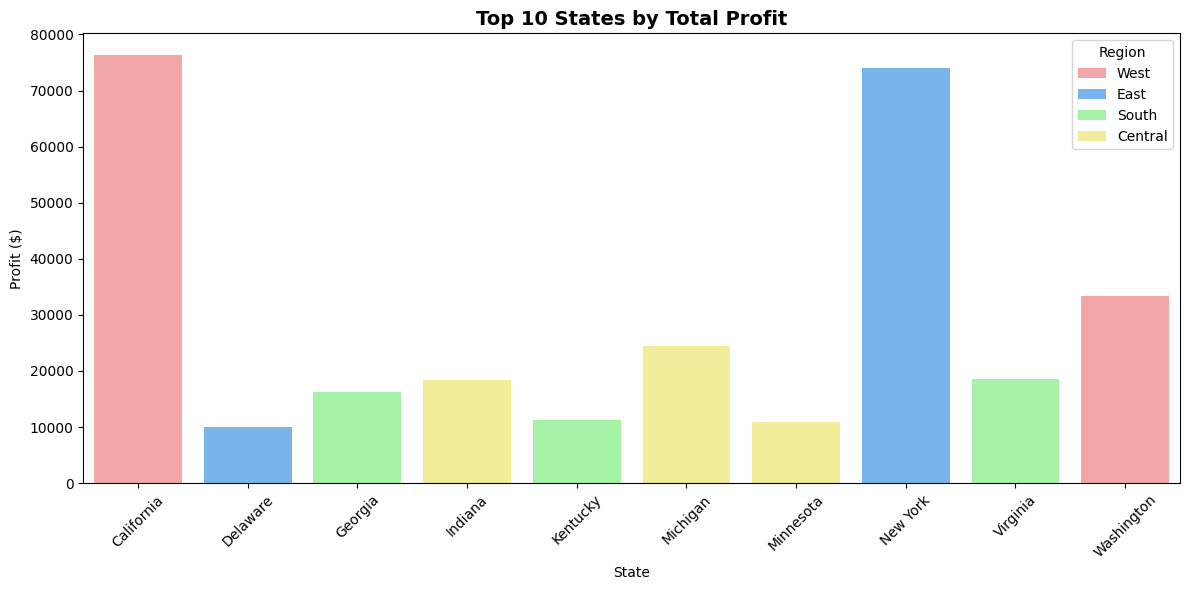

In [32]:
# Group by State and Region, sum the Profit
top_states = df.groupby(['State', 'Region'])['Profit'].sum().reset_index()

# Get top 10 states by total profit
top_10_states = top_states.groupby('State')['Profit'].sum().nlargest(10).index

# Filter the original group to include only top 10 states
filtered_data = top_states[top_states['State'].isin(top_10_states)]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='State', y='Profit', hue='Region', estimator=sum,
            palette=['#ff9999', '#66b3ff', '#99ff99', '#FFFA8D'])
plt.title("Top 10 States by Total Profit", fontsize=14, fontweight='bold')
plt.ylabel("Profit ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='Ship Mode', ylabel='Profit'>

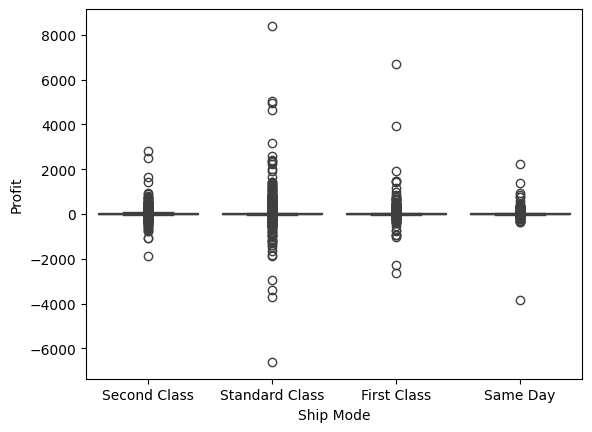

In [34]:
sns.boxplot(data=df, x='Ship Mode', y='Profit')

<b>Is there a correlation between discount and profit?</b>

          Discount    Profit
Discount  1.000000 -0.219487
Profit   -0.219487  1.000000


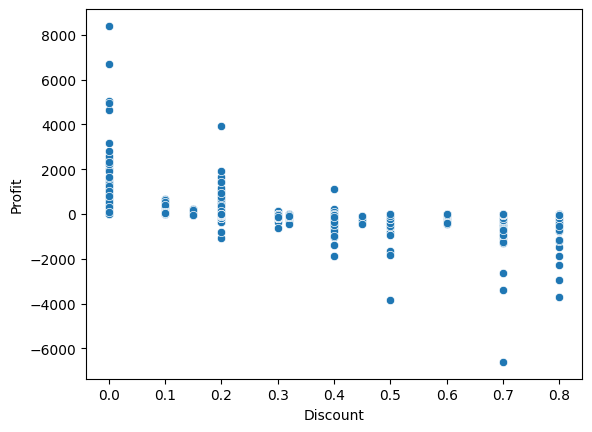

In [35]:
sns.scatterplot(data=df, x='Discount', y='Profit')
print(df[['Discount', 'Profit']].corr())

<Axes: xlabel='Segment'>

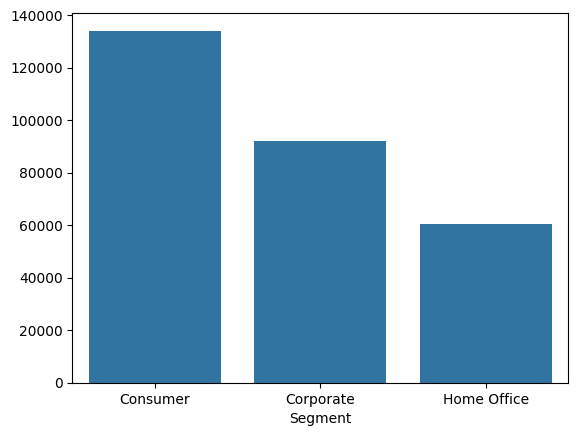

In [36]:
segment_profit = df.groupby('Segment')['Profit'].sum()
sns.barplot(x=segment_profit.index, y=segment_profit.values)

In [39]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(5)
print(top_customers)

Customer Name
Sean Miller      25043.050
Tamara Chand     19052.218
Raymond Buch     15117.339
Tom Ashbrook     14595.620
Adrian Barton    14473.571
Name: Sales, dtype: float64


<b>Forecasting Sales</b>

In [41]:
!pip install statsmodels


                                              0.0/9.9 MB ? eta -:--:--
                                              0.0/9.9 MB 682.7 kB/s eta 0:00:15
                                              0.0/9.9 MB 393.8 kB/s eta 0:00:25
                                              0.1/9.9 MB 563.7 kB/s eta 0:00:18
                                              0.2/9.9 MB 1.1 MB/s eta 0:00:09
     -                                        0.4/9.9 MB 2.1 MB/s eta 0:00:05
     ---                                      0.9/9.9 MB 3.6 MB/s eta 0:00:03
     -----                                    1.5/9.9 MB 4.6 MB/s eta 0:00:02
     ----------                               2.5/9.9 MB 7.1 MB/s eta 0:00:02
     -------------                            3.4/9.9 MB 8.4 MB/s eta 0:00:01
     ---------------                          3.7/9.9 MB 9.1 MB/s eta 0:00:01
     ---------------                          3.7/9.9 MB 9.1 MB/s eta 0:00:01
     -----------------                        4.4/9.9 MB 8.3 MB/s


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: C:\Users\CG\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

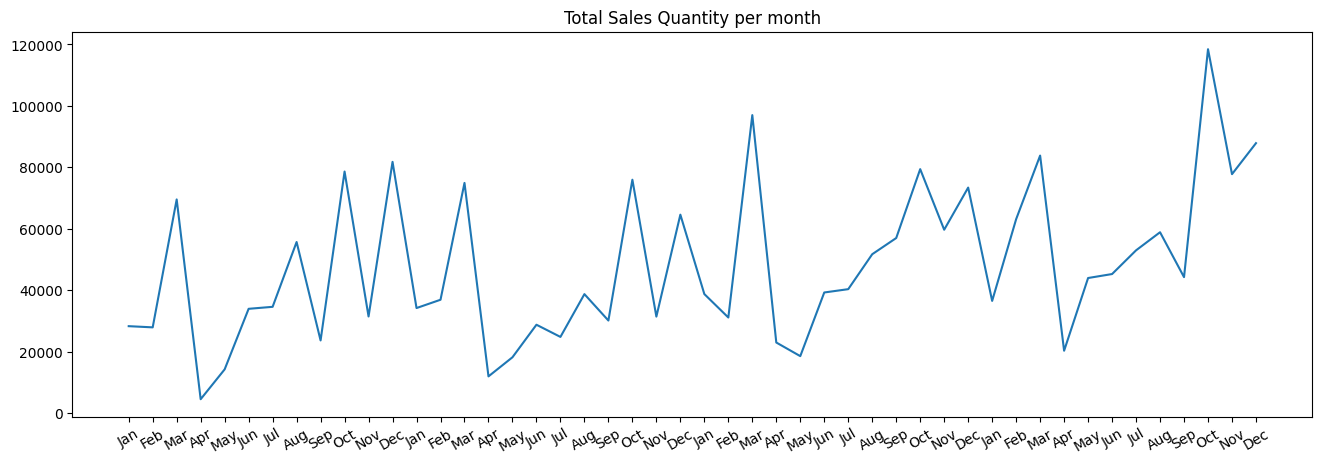

In [46]:
pd.crosstab(columns=df['Month'],
            index=df['Year'],
            values=df['Sales'],
            aggfunc='sum')
import matplotlib.pyplot as plt
SalesQuantitiy=pd.crosstab(columns=df['Year'],
            index=df['Month'],
            values=df['Sales'],
            aggfunc='sum').melt()['value']

MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

# Plotting the sales
%matplotlib inline
SalesQuantitiy.plot(kind='line', figsize=(16,5), title='Total Sales Quantity per month')
# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=30)

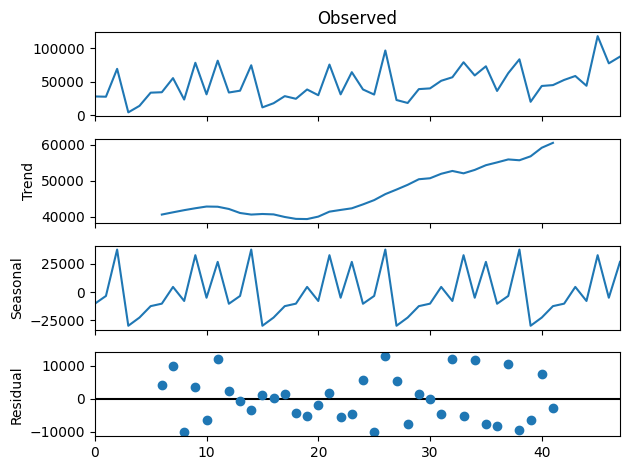

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = SalesQuantitiy.values

# Use 'period' instead of 'freq'
result = seasonal_decompose(series, model='additive', period=12)

result.plot()
CurrentFig = plt.gcf()


Training the model on full dataset

In [51]:
SarimaxModel = model = SARIMAX(SalesQuantitiy,  
                        order = (5, 1, 10),  
                        seasonal_order =(1, 0, 0, 12))
SalesModel = SarimaxModel.fit()

In [52]:
forecast = SalesModel.predict(start = 0,
                          end = (len(SalesQuantitiy)) + 6,
                          typ = 'levels').rename('Forecast')
print("Next Six Month Forecast:",forecast[-6:])

Next Six Month Forecast: 49     83978.676187
50    106489.175136
51     35735.189194
52     50487.559334
53     54754.082413
54     75145.206860
Name: Forecast, dtype: float64


<Axes: title={'center': 'Time Series Sales Forecasts'}>

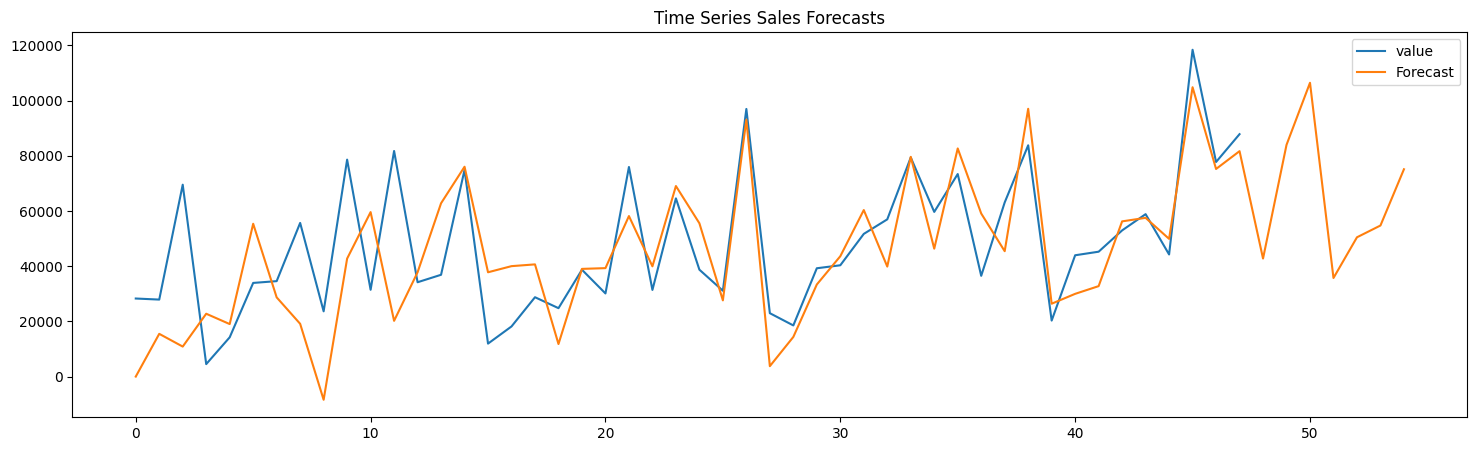

In [53]:
SalesQuantitiy.plot(figsize = (18, 5), legend = True, title='Time Series Sales Forecasts')
forecast.plot(legend = True, figsize=(18,5))

Measuring the accuracy of the model

In [58]:
MAPE=np.mean(abs(SalesQuantitiy-forecast)/SalesQuantitiy)*100
print(' Accuracy of model:', round(100-MAPE,2),)



 Accuracy of model: 52.76
